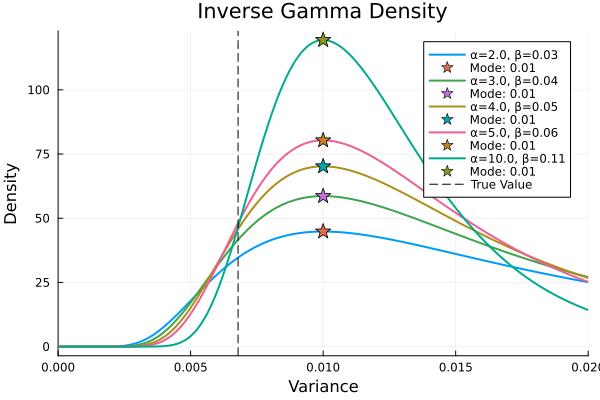

In [13]:
using Distributions
using Plots

function plot_inverse_gamma(hyperparams::Vector{Tuple{Float64,Float64}};
                            true_value::Union{Nothing,Float64}=nothing,
                            xlims::Tuple{Float64,Float64}=(0,1.0))
    # Create an empty plot
    p = plot(title="Inverse Gamma Density", xlabel="Variance", ylabel="Density", xlim=xlims)
    
    # Iterate over the hyperparameter pairs and plot each density
    for (α, β) in hyperparams
        dist = InverseGamma(α, β)
        xs = range(xlims[1], xlims[2], length=500)
        ys = pdf.(dist, xs)
        label_str = "α=$(α), β=$(β)"
        plot!(p, xs, ys, label=label_str, lw=2)
        
        # If α > 1, the mode exists and can be computed
        if α > 1
            mode_value = β / (α + 1)
            scatter!(p, [mode_value], [pdf(dist, mode_value)],
                     label="Mode: $(round(mode_value, digits=4))",
                     markershape=:star, markersize=8)
        end
    end

    # If a true value is provided, mark it with a vertical dashed line.
    if true_value !== nothing
        vline!(p, [true_value], label="True Value", linestyle=:dash, color=:black)
    end

    return p
end

# Define hyperparameter pairs for the inverse gamma priors.
# These examples set the mode of each prior to 0.00679:
hyperparams = [
    (2.0, 3 * 0.01),  # using α = 2, mode = β/(2+1) = 0.00679
    (3.0, 4 * 0.01),  # using α = 3, mode = β/(3+1) = 0.00679
    (4.0, 5 * 0.01),   # using α = 4, mode = β/(4+1) = 0.00679
    (5.0, 6 * 0.01),   # using α = 5, mode = β/(5+1) = 0.00679
    (10.0, 11 * 0.01) # using α = 10, mode = β/(10+1) = 0.00679
]

p = plot_inverse_gamma(hyperparams; true_value=0.00679, xlims=(0.0,0.02))
display(p)


LoadError: cannot assign a value to imported variable Distributions.params from module Main